# Titanic EDA --Let me tell you the story

This kernel serves as a beginner tutorial and basic guideline for approaching the Exploratory data analysis.0.
I decided to write this kernel because Titanic: Machine Learning from Disaster is one of my favorite competitions on Kaggle. This is a beginner level kernel which focuses on Exploratory Data Analysis. A lot of people start Kaggle with this competition and they get lost in extremely long tutorial kernels. This is a short kernel compared to the other ones. I hope this will be a good guide for starters and inspire them with new feature engineering ideas.

Exploratory Data Analysis(EDA):
1)Analysis of the features.
2)Finding any relations or trends considering multiple features.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
import re

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')

In [4]:
train.head(10)

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      McCarthy, Mr. Timothy J    male  54.0   
8                               Palsson, Master. Gosta Leonard    male   2.0   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
10                         Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
6                0      0            330877   8.4583   NaN        Q  
7                0      0             17463  51.8625   E46        S  
8                3      1            349909  21.0750   NaN        S  
9                0      2            347742  11.1333   NaN        S  
10               1      0            237736  30.0708   NaN        C

In [5]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Dictionary

| Variable      | Definition    | Key                     |
| ------------- |:-------------:| -----------------------:|
| survival      | Survival      |0 = No, 1 = Yes          |
|pclass	        |Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	        |Sex	        |                         |
|Age	        |Age in years   |	                      |
|sibsp	        |siblings   	|                         |
|parch	        |children aboard|                         |
|ticket	        |Ticket number  |                         |
|fare           |Passenger fare	|                         |
|cabin	        |Cabin number   |                         |	
|embarked	    |Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|  

Variable Notes  
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  
 

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

In [6]:
train.describe().T

count       mean        std   min      25%      50%   75%       max
Survived  891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.0    1.0000
Pclass    891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0    3.0000
Age       714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
SibSp     891.0   0.523008   1.102743  0.00   0.0000   0.0000   1.0    8.0000
Parch     891.0   0.381594   0.806057  0.00   0.0000   0.0000   0.0    6.0000
Fare      891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292

# Step 1
# Checking Null Values

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


So the total number of rows we have 891 and two variable have missing values.

Age = 891-714 = 177 missing values

Cabin = 891 - 204 = 687

So Cabin has a lot of missing values so we have to decide that if we have to impute values by using a method or to delete this variable.

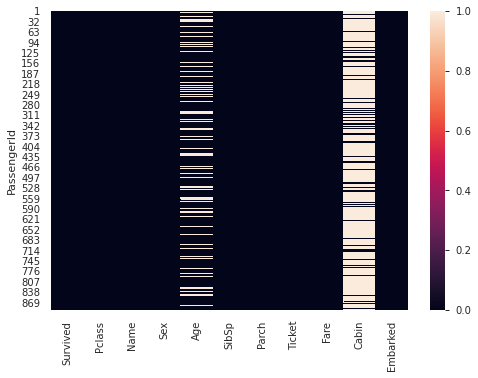

In [8]:
sns.heatmap(train.isnull())

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"


# Understanding data using single line
Whenever you want to get started on a problem like regression and classification using machine learning just use ProfileReport it will give us initial insights that will be very useful to understand the data provided.Let's see what we have got..

In [9]:
pandas_profiling.ProfileReport(train)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Analyze the profile 

# Bar Chart for Categorical Features
Survived

Pclass

Sex

SibSp ( # of siblings and spouse)

Parch ( # of parents and children)

Embarked

Cabin

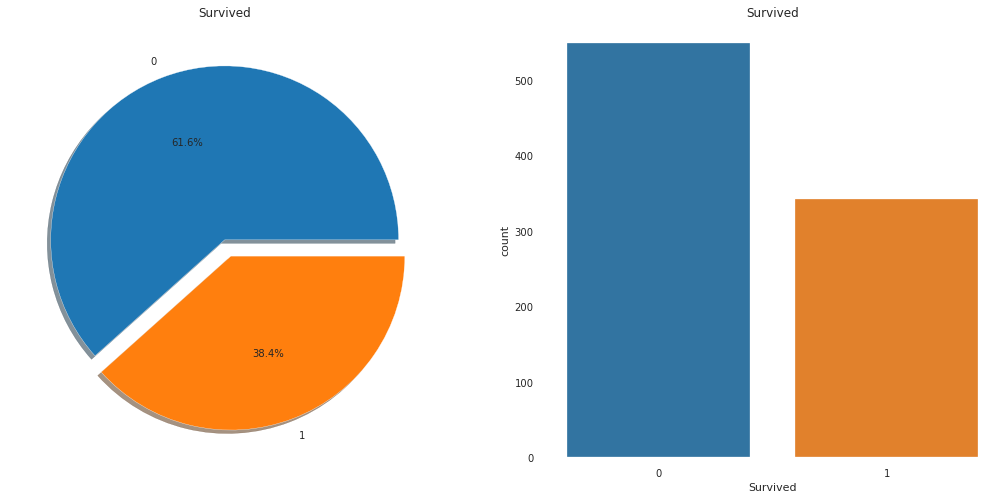

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

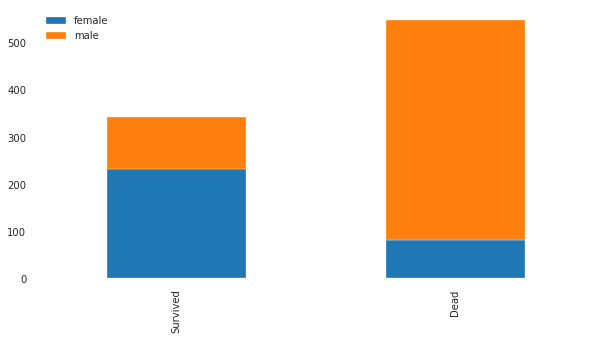

In [12]:
bar_chart('Sex')

# The Chart confirms **Women** more likely survivied than **Men**
 It is possible that we could use sex to create a new feature by combining it with other features.

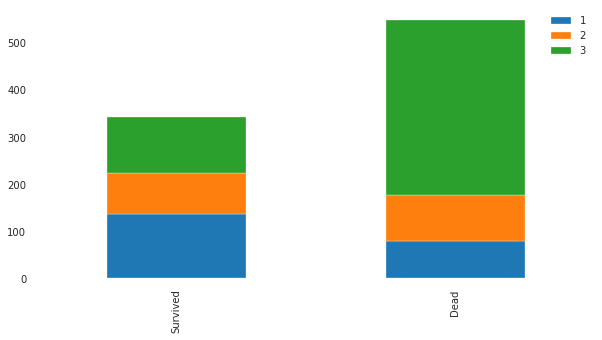

In [13]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

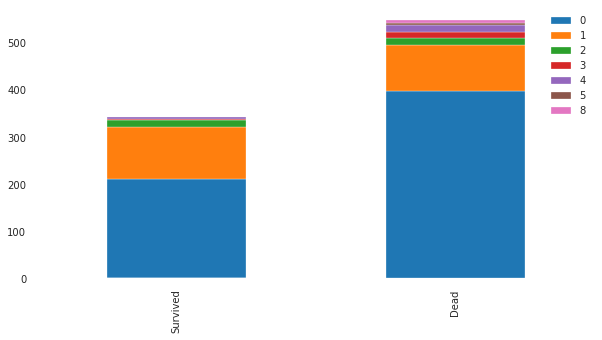

In [14]:
bar_chart('SibSp')

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived  
The Chart confirms a person aboarded without siblings or spouse more likely dead

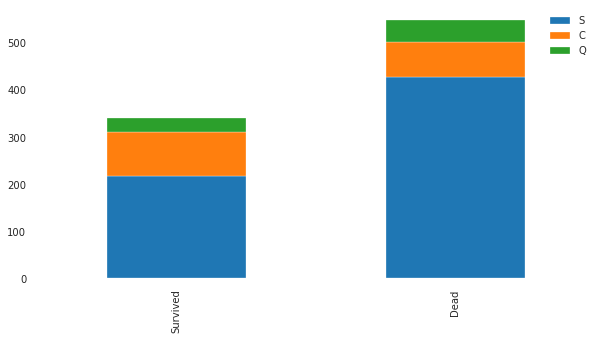

In [15]:
bar_chart('Embarked')

The Chart confirms a person aboarded from C slightly more likely survived

The Chart confirms a person aboarded from Q more likely dead

The Chart confirms a person aboarded from S more likely dead

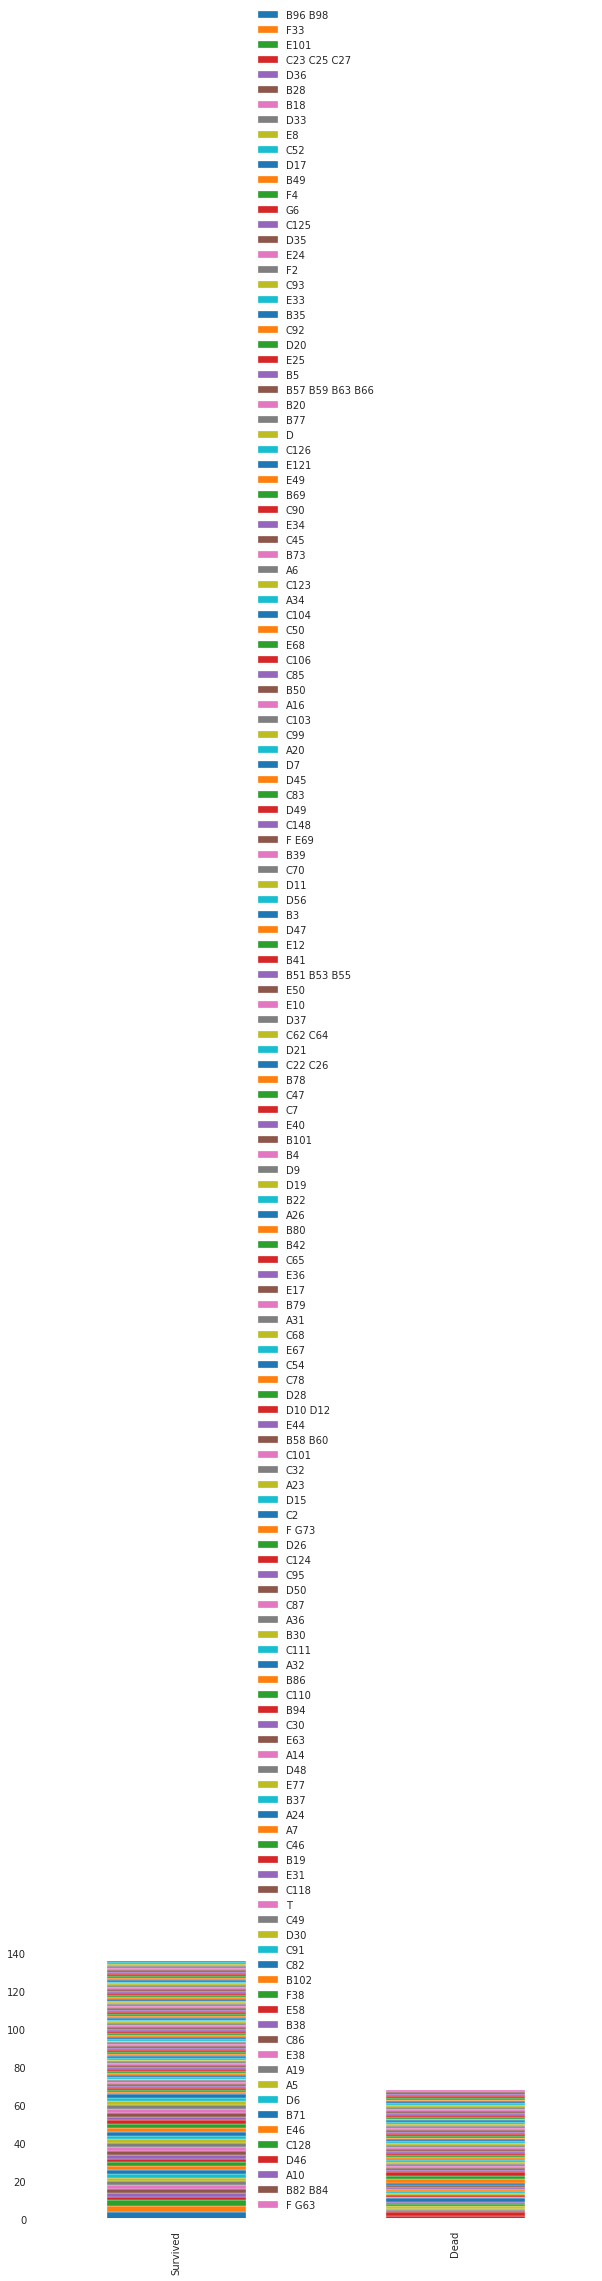

In [16]:
bar_chart('Cabin')

Too much cabin names so this graph doesn't help much.

# 'Family Size - Survived Plot'

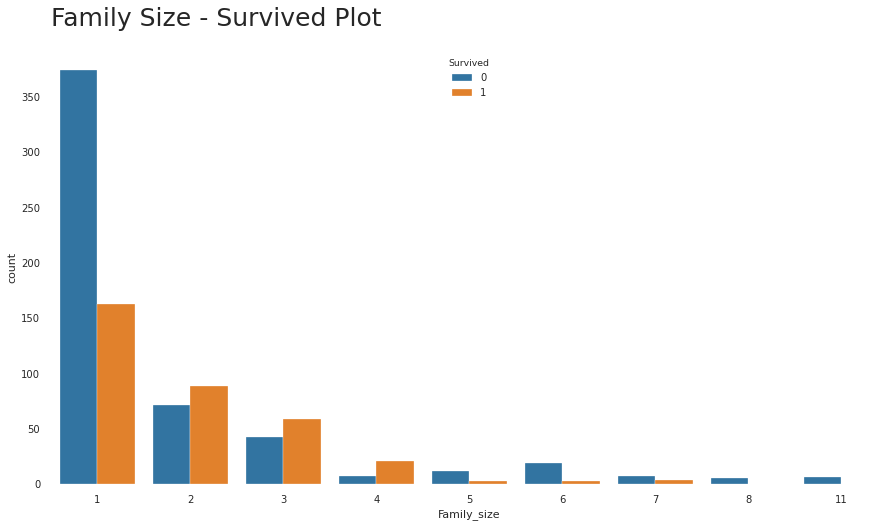

In [17]:
temp = train.copy()
temp['Family_size'] = temp['SibSp'] + temp['Parch'] + 1

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.countplot(data=temp, x='Family_size', hue='Survived', ax=ax)
ax.set_title('Family Size - Survived Plot', size=25, loc='Left', y=1.04)

plt.show()

In the data provided to us, each individual has a SibSp and Parch, so if we add these features together for an individual and add 1 to it, 1 being the individual themself, we can create a new feature Family_size.

It is an important feature as it reveals that passengers with family size 2 - 4 had a better survival rate than passengers travelling alone or who had larger families.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


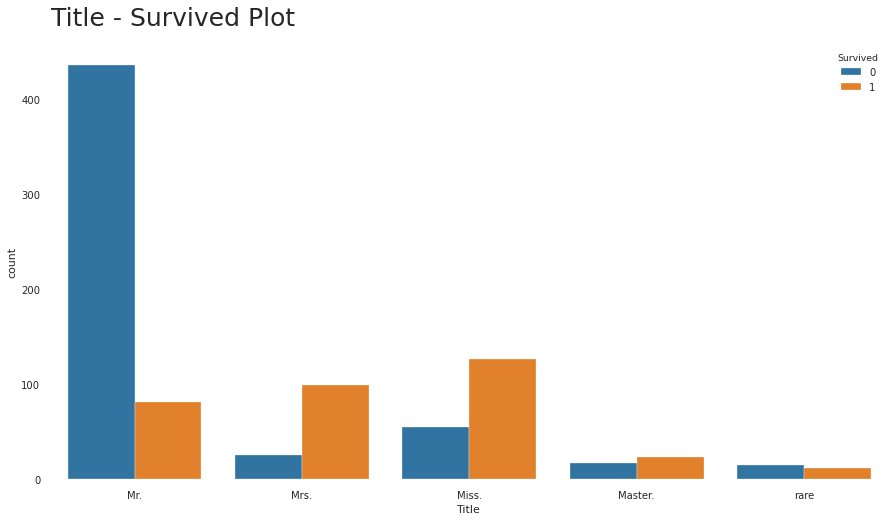

In [18]:
temp = train.copy()
temp['Title'] = temp.Name.str.extract(pat='([a-zA-Z]+\.)')
temp.Title[~temp.Title.isin(['Mr.', 'Miss.', 'Mrs.', 'Master.'])] = 'rare'
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.countplot(data=temp, x='Title', hue='Survived', ax=ax)
ax.set_title('Title - Survived Plot', loc='Left', size=25, y=1.03)
plt.show()

The above plot shows that Mrs., Miss. and Master. titles had better chances if survival, chances of survival is less than that for survival in case of Mr. and rare title, but it is worse for the Mr. title as we have seen same insights from gender variable.


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


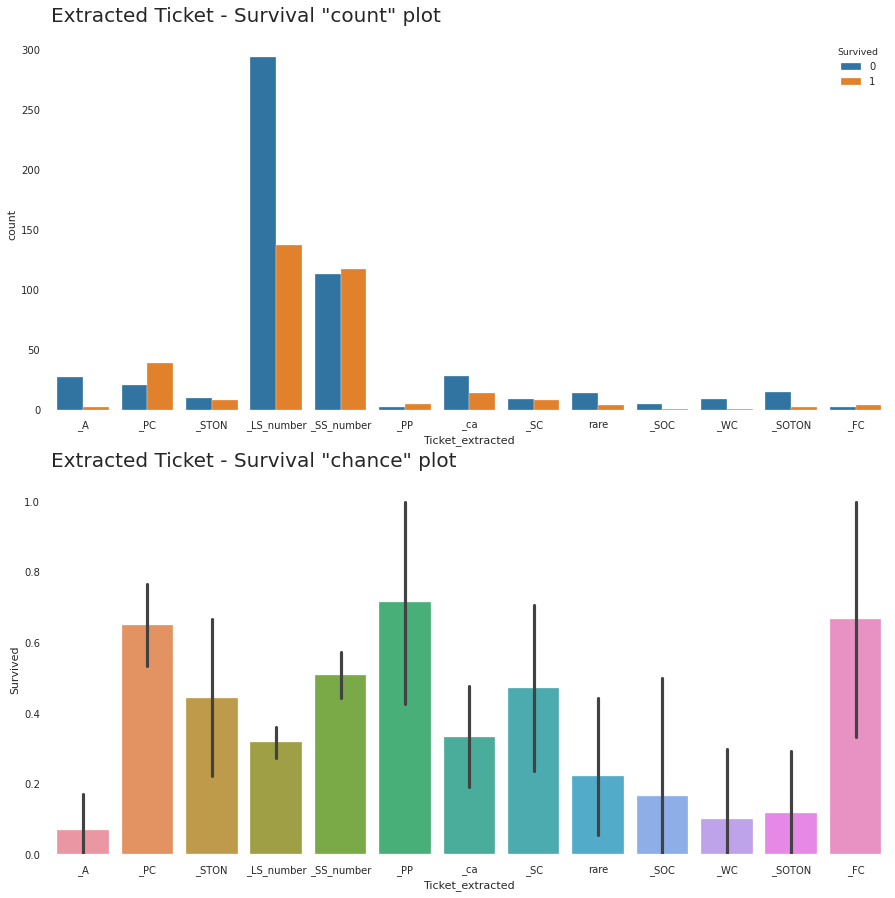

In [19]:
def ticket_extractor(ticket):
    alpha = re.sub('\d', '', ticket)
    if alpha:
        return alpha
    else:
        num = re.search('\d{1,9}', ticket)
        return ticket
    
temp = train.copy()
temp['Ticket_extracted'] = temp.Ticket.apply(ticket_extractor)
for i in range(len(temp.Ticket)):
    try:
        int(temp.Ticket_extracted.iloc[i])
        temp.Ticket_extracted.iloc[i] = f'Num_{len(temp.Ticket_extracted.iloc[i])}'
    except:
        continue
for label, pattern in [('_ca', 'C[.]?A[.]?'), ('_PC', 'PC'), ('_SOTON', 'SOTON'), ('_STON', 'STON'), 
                       ('_WC', 'W[.]?[/]?C'), ('_SC', 'S[.]?C[.]?'), ('_A', 'A[.]?'), ('_SOC', 'S[.]?O[.]?[/]?C'), 
                       ('_PP', 'PP'), ('_FC', '(F.C.|F.C.C.)'), ('_LS_number', 'Num_(6|7)'), ('_SS_number', 'Num_(3|4|5)'), 
                       ('rare', '^[^_]')]:
    temp.Ticket_extracted[temp.Ticket_extracted.str.contains(pattern)] = label
    
temp['Ticket_extracted'].value_counts(dropna=False)

fig, ax = plt.subplots(2, 1, figsize=(15, 15))
sns.countplot(data=temp, x='Ticket_extracted', hue='Survived', ax=ax[0])
ax[0].set_title('Extracted Ticket - Survival "count" plot', size=20, loc='Left', y=1.03)

sns.barplot(data=temp, x='Ticket_extracted', y='Survived', ax=ax[1])
ax[1].set_title('Extracted Ticket - Survival "chance" plot', size=20, loc='Left', y=1.03)

plt.show()

Looks decent, what attracts my attention is the ticket A, PC, CA, Large_Serial_number and Small_Serial_number as they are quite a few of these tickets to be confident in the survival chances shown by these tickets. This feature might help us improve the probability of survival of few passengers and may push there probability of survival over 50% if they actually survived, to get classified as survived, which is actually the problem with many instances as they get classified as not survived, i.e probability of survival is lower than 50%.

# Chances for Survival by Port Of Embarkation

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


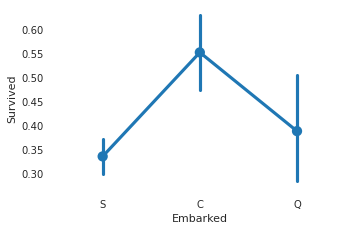

In [20]:
sns.factorplot('Embarked','Survived',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

# Charts for Numerical Features

Fare

Age

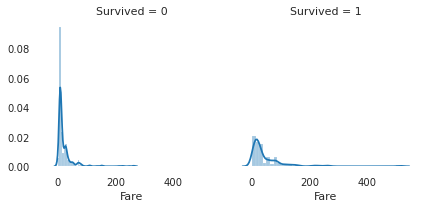

In [21]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Fare")

While the picture isn't super clear, you can see that survivors had more expensive fares and a wider spread of fare prices. 

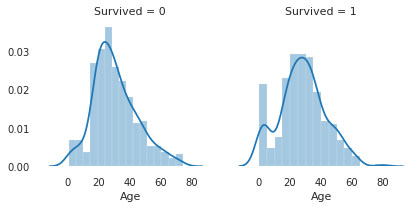

In [22]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

First, there are some missing values that need to be dealt with. There are (at least) three ways we can deal with this, each one being slightly more effort.

1) We can just drop the rows with missing data. While this might be tempting, dropping a row with around 14 other entries just because of one missing value doesn't sound like the brightest idea.

2) We can replace the missing data with the average age (whether it's median/mode/mean) of the data set. This would be a good first pass method and it would let us get the models up and running.

3) We can replace the missing data with the average from similar passengers. For example, if we're missing the age of a 1st class passenger, who is female, who embarked from C etc. we could substitute in the age of other passengers who fit that description.

# Correlations

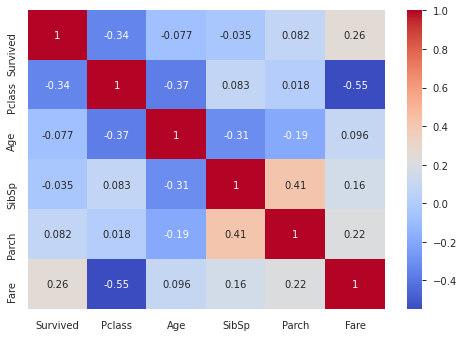

In [23]:
sns.heatmap(train.corr(), cmap = 'coolwarm', annot = True)

Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Fare and Survive has best correlation


# OUTLIERS

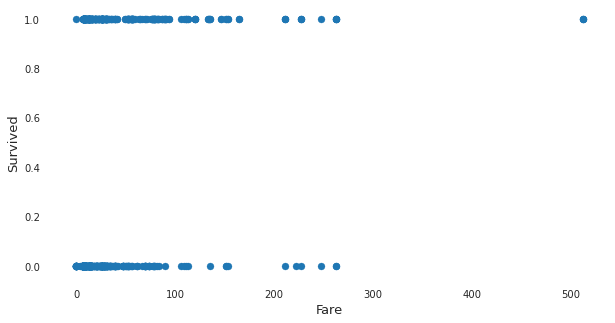

In [24]:
t  = train.copy()
target = 'Survived'
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x = t["Fare"], y = t[target])
plt.ylabel(target, fontsize=13)
plt.xlabel("Fare", fontsize=13)
plt.show()


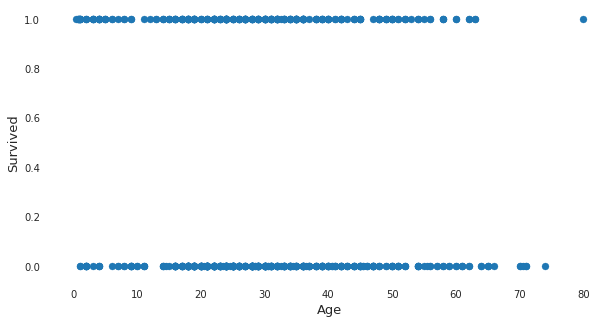

In [25]:
t  = train.copy()
target = 'Survived'
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x = t["Age"], y = t[target])
plt.ylabel(target, fontsize=13)
plt.xlabel("Age", fontsize=13)
plt.show()

The analysis for outliers show that Fare, Embarked and Parch column have some outliers.

We will try to remove these outlier rows in each of the columns to make sure our analysis is accurate

Outliers can really influence the final model.
They tend to drag averages up or down and can really change the predictive capabilities of the model.

# OBSERVATIONS

Age,Cabin have null values that must be treated.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash.

Women more likely survivied than Men

The analysis for outliers show that Fare, Embarked and Parch column have some outliers.
Fare and Survive has best correlation.Variable are not very much correlated so we can use them all.

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

It is an important feature as it reveals that passengers with family size 2 - 4 had a better survival rate than passengers travelling alone or who had larger families.

Person aboarded from C slightly more likely survived,Q more likely dead,S more likely dead.

1st class more likely survivied than other classes
3rd class more likely dead than other classes

# Thanks a lot for having a look at this notebook. If you found this notebook useful, Do Upvote.

If you have forked the kernel and not upvoted yet, then show the support by upvoting :)

Please leave you constructive criticism and suggestion in comments below!!